### Importing Data

In [ ]:
import csv
import numpy as np


columnE = []
columnF = []
columnG = []
columnJ = []



with open('dataset.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        columnE.append(float(row['voltage_measured']))
        columnF.append(float(row['current_measured']))
        columnG.append(float(row['temperature_measured']))
        columnJ.append(float(row['time']))


voltage = np.array(columnE)
current = np.array(columnF)
temperature = np.array(columnG)
time = np.array(columnJ)


### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

# Fit the model
model_temp_vs_v = LinearRegression()
model_temp_vs_v.fit(voltage.reshape(-1, 1), temperature)

# Get the coefficients
a_v = model_temp_vs_v.coef_[0]
b_v = model_temp_vs_v.intercept_

# Temperature as a function of Voltage
temp_vs_v = lambda v: a_v * v + b_v

In [ ]:
# Fit the model
model_temp_vs_i = LinearRegression()
model_temp_vs_i.fit(current.reshape(-1, 1), temperature)

# Get the coefficients
a_i = model_temp_vs_i.coef_[0]
b_i = model_temp_vs_i.intercept_

# Temperature as a function of Current
temp_vs_i = lambda i: a_i * i + b_i

In [ ]:
# Fit the model
model_temp_vs_t = LinearRegression()
model_temp_vs_t.fit(time.reshape(-1, 1), temperature)

# Get the coefficients
a_t = model_temp_vs_t.coef_[0]
b_t = model_temp_vs_t.intercept_

# Temperature as a function of Time
temp_vs_t = lambda t: a_t * t + b_t

Temperature vs Voltage:
Equation: Temp = -15.7345 * V + 88.1279

Temperature vs Current:
Equation: Temp = 2.3163 * I + 37.0002

Temperature vs Time:
Equation: Temp = 0.0040 * t + 26.5910


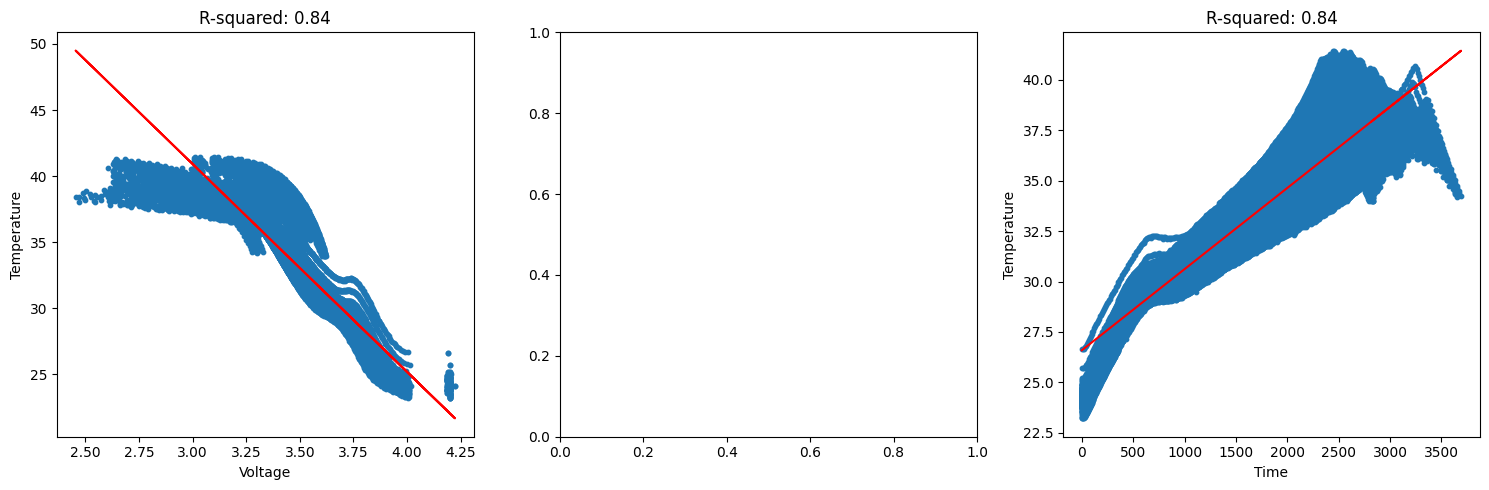


Predictions:
Temperature at Voltage = 4.5: 17.32
Temperature at Current = 8.2: 55.99
Temperature at Time = 2500: 36.66


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Step 3: Interpret the results
print("Temperature vs Voltage:")
print(f"Equation: Temp = {a_v:.4f} * V + {b_v:.4f}")

print("\nTemperature vs Current:")
print(f"Equation: Temp = {a_i:.4f} * I + {b_i:.4f}")

print("\nTemperature vs Time:")
print(f"Equation: Temp = {a_t:.4f} * t + {b_t:.4f}")

# Step 4: Validate the models
# Plot the original data points and the linear regression lines
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(voltage, temperature, s=10)
axes[0].plot(voltage, temp_vs_v(voltage), color='r')
axes[0].set_xlabel('Voltage')
axes[0].set_ylabel('Temperature')
axes[0].set_title(f'R-squared: {r2_score(temperature, temp_vs_v(voltage)):.2f}')

# axes[1].scatter(current, temperature, s=10)
# axes[1].plot(current, temp_vs_i(current), color='r')
# axes[1].set_xlabel('Current')
# axes[1].set_ylabel('Temperature')
# axes[1].set_title(f'R-squared: {r2_score(temperature, temp_vs_i(current)):.2f}')

axes[2].scatter(time, temperature, s=10)
axes[2].plot(time, temp_vs_t(time), color='r')
axes[2].set_xlabel('Time')
axes[2].set_ylabel('Temperature')
axes[2].set_title(f'R-squared: {r2_score(temperature, temp_vs_t(time)):.2f}')

plt.tight_layout()
plt.show()

# Step 5: Use the models
# Predict the temperature for given values of Voltage, Current, and Time
print("\nPredictions:")
print(f"Temperature at Voltage = 4.5: {temp_vs_v(4.5):.2f}")
print(f"Temperature at Current = 8.2: {temp_vs_i(8.2):.2f}")
print(f"Temperature at Time = 2500: {temp_vs_t(2500):.2f}")

### Polynomial Regression

Temperature vs Voltage R-squared: 0.87
Temperature vs Time R-squared: 0.87


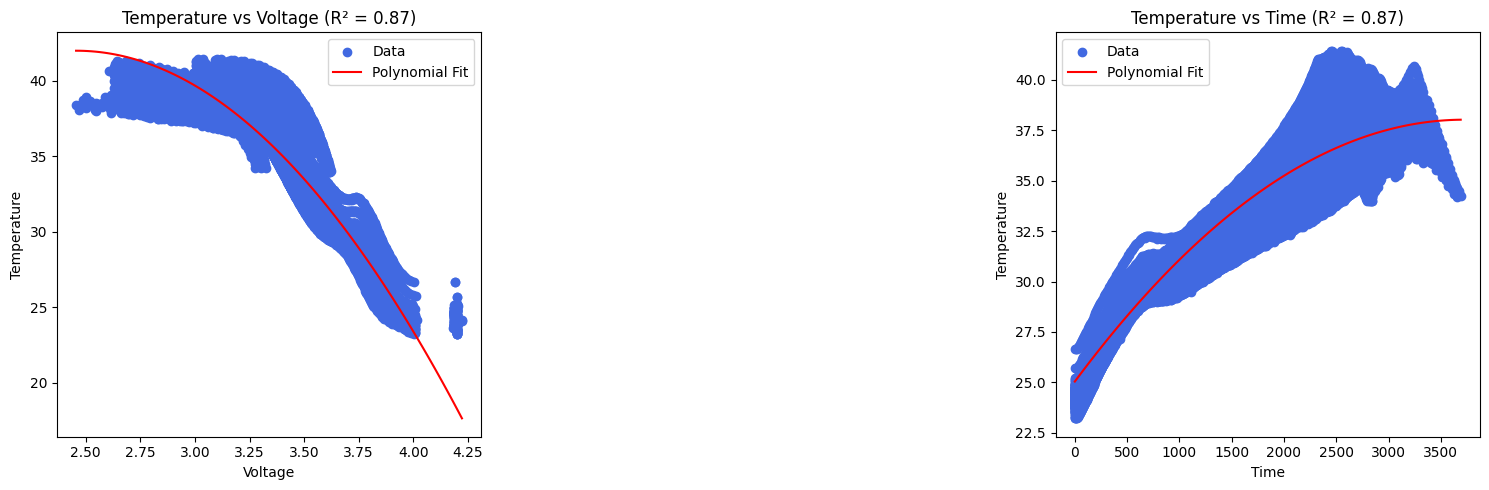

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming you have your data in voltage, current, time, and temperature arrays

# Temperature vs Voltage
X_v = voltage.reshape(-1, 1)
poly_v = PolynomialFeatures(degree=2)
X_v_poly = poly_v.fit_transform(X_v)
model_temp_vs_v = LinearRegression()
model_temp_vs_v.fit(X_v_poly, temperature)
r2_v = model_temp_vs_v.score(X_v_poly, temperature)
print(f"Temperature vs Voltage R-squared: {r2_v:.2f}")

# # Temperature vs Current
# X_i = current.reshape(-1, 1)
# poly_i = PolynomialFeatures(degree=2)
# X_i_poly = poly_i.fit_transform(X_i)
# model_temp_vs_i = LinearRegression()
# model_temp_vs_i.fit(X_i_poly, temperature)
# r2_i = model_temp_vs_i.score(X_i_poly, temperature)
# print(f"Temperature vs Current R-squared: {r2_i:.2f}")

# Temperature vs Time
X_t = time.reshape(-1, 1)
poly_t = PolynomialFeatures(degree=2)
X_t_poly = poly_t.fit_transform(X_t)
model_temp_vs_t = LinearRegression()
model_temp_vs_t.fit(X_t_poly, temperature)
r2_t = model_temp_vs_t.score(X_t_poly, temperature)
print(f"Temperature vs Time R-squared: {r2_t:.2f}")

# Plotting
plt.figure(figsize=(15, 5))

# Temperature vs Voltage
plt.subplot(131)
plt.scatter(voltage, temperature, color='royalblue', label='Data')
X_v_range = np.linspace(voltage.min(), voltage.max(), 100).reshape(-1, 1)
X_v_range_poly = poly_v.transform(X_v_range)
y_v_pred = model_temp_vs_v.predict(X_v_range_poly)
plt.plot(X_v_range, y_v_pred, color='red', label='Polynomial Fit')
plt.xlabel('Voltage')
plt.ylabel('Temperature')
plt.title(f'Temperature vs Voltage (R² = {r2_v:.2f})')
plt.legend()

# # Temperature vs Current
# plt.subplot(132)
# plt.scatter(current, temperature, color='royalblue', label='Data')
# X_i_range = np.linspace(current.min(), current.max(), 100).reshape(-1, 1)
# X_i_range_poly = poly_i.transform(X_i_range)
# y_i_pred = model_temp_vs_i.predict(X_i_range_poly)
# plt.plot(X_i_range, y_i_pred, color='red', label='Polynomial Fit')
# plt.xlabel('Current')
# plt.ylabel('Temperature')
# plt.title(f'Temperature vs Current (R² = {r2_i:.2f})')
# plt.legend()

# Temperature vs Time
plt.subplot(133)
plt.scatter(time, temperature, color='royalblue', label='Data')
X_t_range = np.linspace(time.min(), time.max(), 100).reshape(-1, 1)
X_t_range_poly = poly_t.transform(X_t_range)
y_t_pred = model_temp_vs_t.predict(X_t_range_poly)
plt.plot(X_t_range, y_t_pred, color='red', label='Polynomial Fit')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title(f'Temperature vs Time (R² = {r2_t:.2f})')
plt.legend()

plt.tight_layout()
plt.show()

### Decision Tree Regressor

Temperature vs Voltage R-squared: 1.00
Temperature vs Time R-squared: 0.97


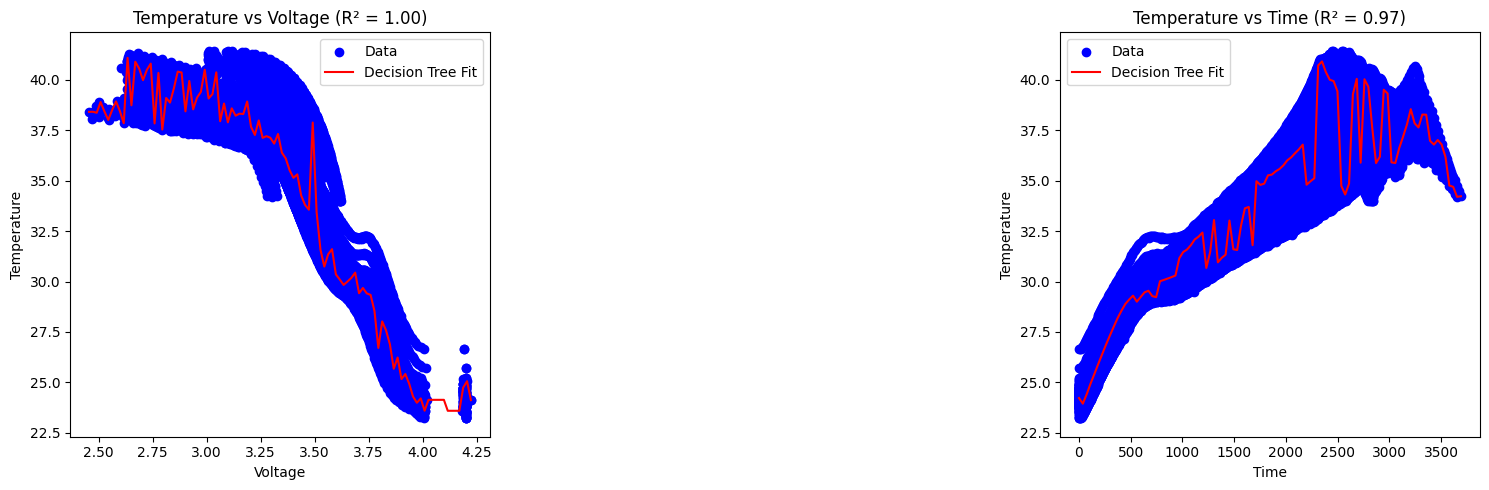

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Assuming you have your data in voltage, current, time, and temperature arrays

# Temperature vs Voltage
model_temp_vs_v = DecisionTreeRegressor()
model_temp_vs_v.fit(voltage.reshape(-1, 1), temperature)
r2_v = model_temp_vs_v.score(voltage.reshape(-1, 1), temperature)
print(f"Temperature vs Voltage R-squared: {r2_v:.2f}")

# # Temperature vs Current
# model_temp_vs_i = DecisionTreeRegressor()
# model_temp_vs_i.fit(current.reshape(-1, 1), temperature)
# r2_i = model_temp_vs_i.score(current.reshape(-1, 1), temperature)
# print(f"Temperature vs Current R-squared: {r2_i:.2f}")

# Temperature vs Time
model_temp_vs_t = DecisionTreeRegressor()
model_temp_vs_t.fit(time.reshape(-1, 1), temperature)
r2_t = model_temp_vs_t.score(time.reshape(-1, 1), temperature)
print(f"Temperature vs Time R-squared: {r2_t:.2f}")

# Plotting
plt.figure(figsize=(15, 5))

# Temperature vs Voltage
plt.subplot(131)
plt.scatter(voltage, temperature, color='blue', label='Data')
X_v_range = np.linspace(voltage.min(), voltage.max(), 100).reshape(-1, 1)
y_v_pred = model_temp_vs_v.predict(X_v_range)
plt.plot(X_v_range, y_v_pred, color='red', label='Decision Tree Fit')
plt.xlabel('Voltage')
plt.ylabel('Temperature')
plt.title(f'Temperature vs Voltage (R² = {r2_v:.2f})')
plt.legend()

# # Temperature vs Current
# plt.subplot(132)
# plt.scatter(current, temperature, color='blue', label='Data')
# X_i_range = np.linspace(current.min(), current.max(), 100).reshape(-1, 1)
# y_i_pred = model_temp_vs_i.predict(X_i_range)
# plt.plot(X_i_range, y_i_pred, color='red', label='Decision Tree Fit')
# plt.xlabel('Current')
# plt.ylabel('Temperature')
# plt.title(f'Temperature vs Current (R² = {r2_i:.2f})')
# plt.legend()

# Temperature vs Time
plt.subplot(133)
plt.scatter(time, temperature, color='blue', label='Data')
X_t_range = np.linspace(time.min(), time.max(), 100).reshape(-1, 1)
y_t_pred = model_temp_vs_t.predict(X_t_range)
plt.plot(X_t_range, y_t_pred, color='red', label='Decision Tree Fit')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title(f'Temperature vs Time (R² = {r2_t:.2f})')
plt.legend()

plt.tight_layout()
plt.show()

### Random Forest Regressor

Temperature vs Voltage R-squared: 0.98
Temperature vs Time R-squared: 0.96


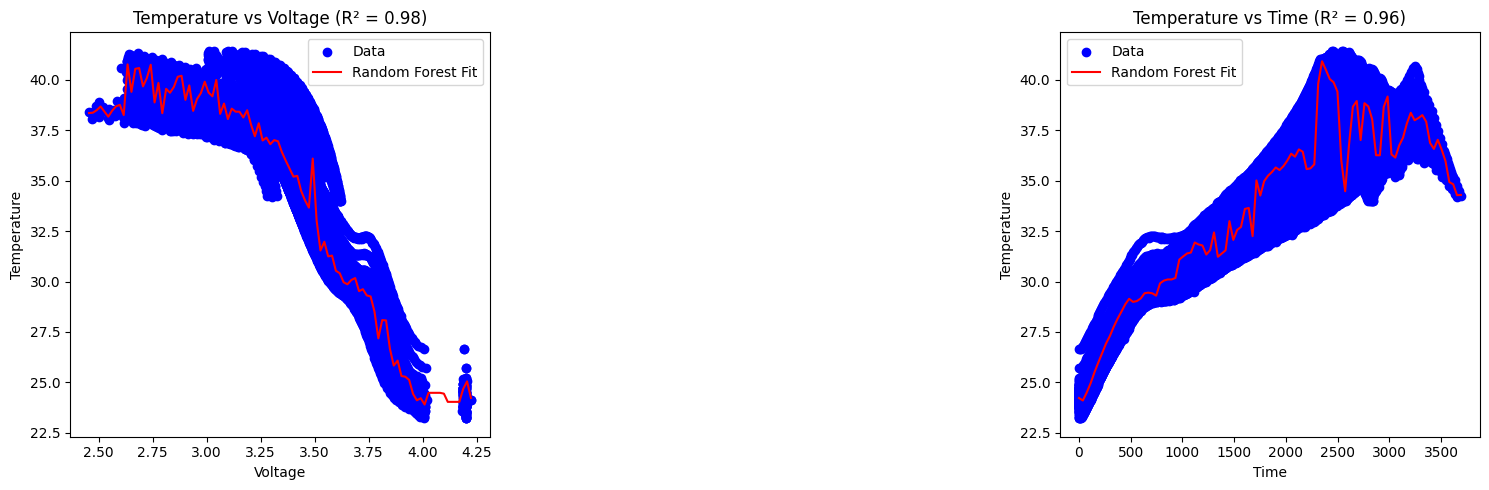

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Assuming you have your data in voltage, current, time, and temperature arrays

# Temperature vs Voltage
model_temp_vs_v = RandomForestRegressor()
model_temp_vs_v.fit(voltage.reshape(-1, 1), temperature)
r2_v = model_temp_vs_v.score(voltage.reshape(-1, 1), temperature)
print(f"Temperature vs Voltage R-squared: {r2_v:.2f}")

# # Temperature vs Current
# model_temp_vs_i = RandomForestRegressor()
# model_temp_vs_i.fit(current.reshape(-1, 1), temperature)
# r2_i = model_temp_vs_i.score(current.reshape(-1, 1), temperature)
# print(f"Temperature vs Current R-squared: {r2_i:.2f}")

# Temperature vs Time
model_temp_vs_t = RandomForestRegressor()
model_temp_vs_t.fit(time.reshape(-1, 1), temperature)
r2_t = model_temp_vs_t.score(time.reshape(-1, 1), temperature)
print(f"Temperature vs Time R-squared: {r2_t:.2f}")

# Plotting
plt.figure(figsize=(15, 5))

# Temperature vs Voltage
plt.subplot(131)
plt.scatter(voltage, temperature, color='blue', label='Data')
X_v_range = np.linspace(voltage.min(), voltage.max(), 100).reshape(-1, 1)
y_v_pred = model_temp_vs_v.predict(X_v_range)
plt.plot(X_v_range, y_v_pred, color='red', label='Random Forest Fit')
plt.xlabel('Voltage')
plt.ylabel('Temperature')
plt.title(f'Temperature vs Voltage (R² = {r2_v:.2f})')
plt.legend()

# # Temperature vs Current
# plt.subplot(132)
# plt.scatter(current, temperature, color='blue', label='Data')
# X_i_range = np.linspace(current.min(), current.max(), 100).reshape(-1, 1)
# y_i_pred = model_temp_vs_i.predict(X_i_range)
# plt.plot(X_i_range, y_i_pred, color='red', label='Random Forest Fit')
# plt.xlabel('Current')
# plt.ylabel('Temperature')
# plt.title(f'Temperature vs Current (R² = {r2_i:.2f})')
# plt.legend()

# Temperature vs Time
plt.subplot(133)
plt.scatter(time, temperature, color='blue', label='Data')
X_t_range = np.linspace(time.min(), time.max(), 100).reshape(-1, 1)
y_t_pred = model_temp_vs_t.predict(X_t_range)
plt.plot(X_t_range, y_t_pred, color='red', label='Random Forest Fit')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title(f'Temperature vs Time (R² = {r2_t:.2f})')
plt.legend()

plt.tight_layout()
plt.show()

### Neural Regressor

Temperature vs Voltage R-squared: 0.90


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Temperature vs Time R-squared: 0.84


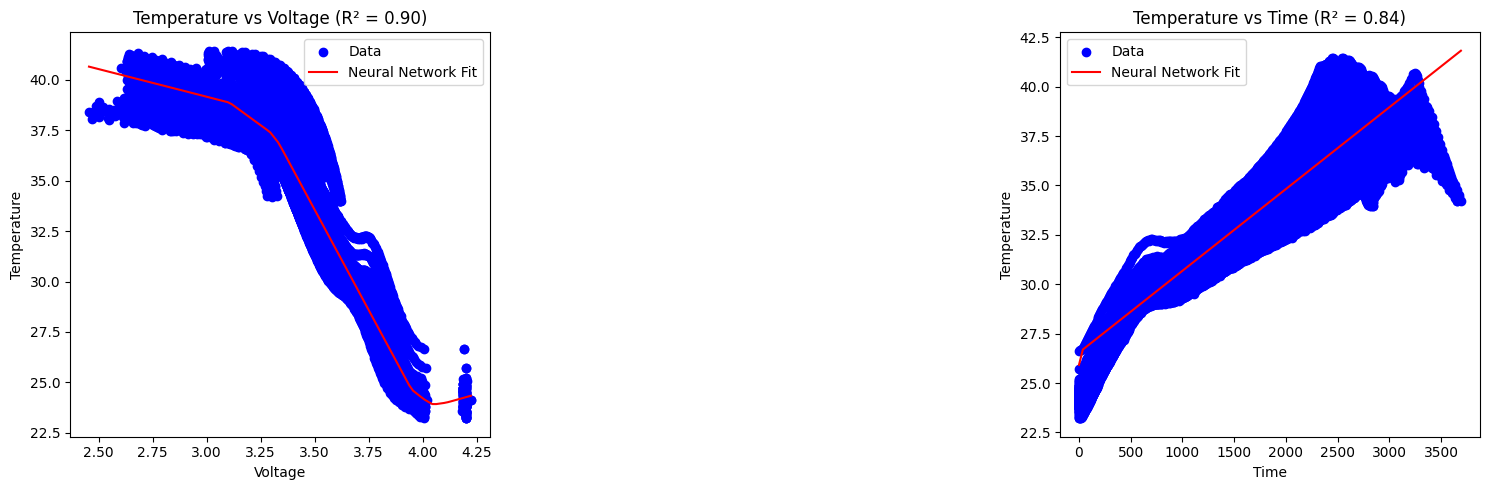

In [ ]:
import numpy as np
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

# Assuming you have your data in voltage, current, time, and temperature arrays

# Temperature vs Voltage
model_temp_vs_v = MLPRegressor()
model_temp_vs_v.fit(voltage.reshape(-1, 1), temperature)
r2_v = model_temp_vs_v.score(voltage.reshape(-1, 1), temperature)
print(f"Temperature vs Voltage R-squared: {r2_v:.2f}")

# # Temperature vs Current
# model_temp_vs_i = MLPRegressor()
# model_temp_vs_i.fit(current.reshape(-1, 1), temperature)
# r2_i = model_temp_vs_i.score(current.reshape(-1, 1), temperature)
# print(f"Temperature vs Current R-squared: {r2_i:.2f}")

# Temperature vs Time
model_temp_vs_t = MLPRegressor()
model_temp_vs_t.fit(time.reshape(-1, 1), temperature)
r2_t = model_temp_vs_t.score(time.reshape(-1, 1), temperature)
print(f"Temperature vs Time R-squared: {r2_t:.2f}")

# Plotting
plt.figure(figsize=(15, 5))

# Temperature vs Voltage
plt.subplot(131)
plt.scatter(voltage, temperature, color='blue', label='Data')
X_v_range = np.linspace(voltage.min(), voltage.max(), 100).reshape(-1, 1)
y_v_pred = model_temp_vs_v.predict(X_v_range)
plt.plot(X_v_range, y_v_pred, color='red', label='Neural Network Fit')
plt.xlabel('Voltage')
plt.ylabel('Temperature')
plt.title(f'Temperature vs Voltage (R² = {r2_v:.2f})')
plt.legend()

# # Temperature vs Current
# plt.subplot(132)
# plt.scatter(current, temperature, color='blue', label='Data')
# X_i_range = np.linspace(current.min(), current.max(), 100).reshape(-1, 1)
# y_i_pred = model_temp_vs_i.predict(X_i_range)
# plt.plot(X_i_range, y_i_pred, color='red', label='Neural Network Fit')
# plt.xlabel('Current')
# plt.ylabel('Temperature')
# plt.title(f'Temperature vs Current (R² = {r2_i:.2f})')
# plt.legend()

# Temperature vs Time
plt.subplot(133)
plt.scatter(time, temperature, color='blue', label='Data')
X_t_range = np.linspace(time.min(), time.max(), 100).reshape(-1, 1)
y_t_pred = model_temp_vs_t.predict(X_t_range)
plt.plot(X_t_range, y_t_pred, color='red', label='Neural Network Fit')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title(f'Temperature vs Time (R² = {r2_t:.2f})')
plt.legend()

plt.tight_layout()
plt.show()